In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import MDAnalysis.analysis.base
from MDAnalysis.analysis import distances
import numpy as np

class DistanceAnalysis(MDAnalysis.analysis.base.AnalysisBase):
  def __init__(self, ag1, ag2, **kwargs):
    super(DistanceAnalysis, self).__init__(ag1.universe.trajectory, **kwargs)
    self._ag1 = ag1
    self._ag2 = ag2
    
  def _prepare(self):
    self.result = []
    
  def _single_frame(self):
    self.result.append(distances.dist(self._ag1, self._ag2)[-1])

  def _conclude(self):
    self.result = np.array(self.result)

In [3]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro')
sim = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_00to02us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_02to04us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_04to06us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_06to08us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_08to10us.xtc')

In [4]:
# Select sulfur on Cys 145 and nitrogen on ring of His 41
SG = sim.select_atoms("resnum 145 and name SG")
SG = SG[0] + SG[0] + SG[1] + SG[1]
N = sim.select_atoms("resnum 41 and (name ND1 or name NE2)")

# Calculate distances throughout the trajectory
R = DistanceAnalysis(SG, N)
R.run()

# Calculate minimum distance between SG and N
d_monomerA = np.min(R.result[:,0:1],1)
d_monomerB = np.min(R.result[:,2:3],1)

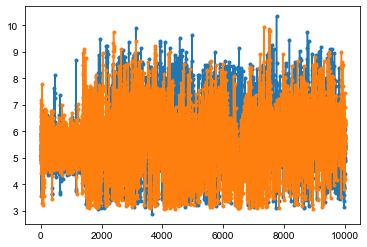

In [5]:
# The distance as a function of time
plt.plot(d_monomerA,'.-')
plt.plot(d_monomerB,'.-')

# Probability densities of dyad distance

<ipython-input-6-f60627cf080a>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(xlim[:-1], -RT*np.log(pdf))
<ipython-input-6-f60627cf080a>:19: RuntimeWarning: divide by zero encountered in log
  plt.plot(xlim[:-1], -RT*np.log(pdf))


Text(0.5, 1.0, 'Potential of mean force')

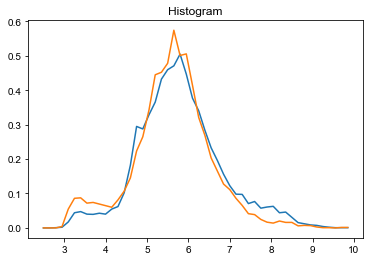

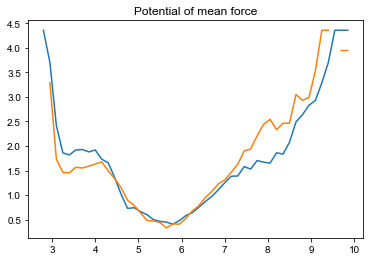

In [6]:
[pdf, xlim] = np.histogram(d_monomerA, bins=50, range=(2.5,10), density=True)

plt.figure(0)
plt.plot(xlim[:-1], pdf)
plt.title('Histogram')

RT = 8.314E-3/4.184*300
plt.figure(1)
plt.plot(xlim[:-1], -RT*np.log(pdf))
plt.title('Potential of mean force')

[pdf, xlim] = np.histogram(d_monomerB, bins=50, range=(2.5,10), density=True)

plt.figure(0)
plt.plot(xlim[:-1], pdf)
plt.title('Histogram')

plt.figure(1)
plt.plot(xlim[:-1], -RT*np.log(pdf))
plt.title('Potential of mean force')

<ipython-input-7-7fb4f1632c5a>:9: RuntimeWarning: divide by zero encountered in log
  F = -RT*np.log(pdf)


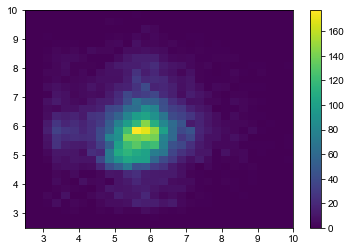

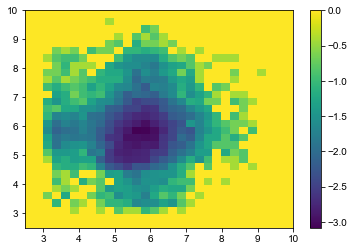

In [7]:
(pdf, xedges, yedges) = np.histogram2d(d_monomerA, d_monomerB, bins=30, range=((2.5,10),(2.5,10)))
X, Y = np.meshgrid(xedges, yedges)

plt.figure(0)
plt.pcolormesh(X,Y,pdf)
plt.colorbar()

plt.figure(1)
F = -RT*np.log(pdf)
F[F==np.inf] = 0
plt.pcolormesh(X,Y,F)
plt.colorbar()

# Joint probabilities of short dyad distances

In [16]:
d_cutoff = 5
pA = np.sum(d_monomerA<d_cutoff)/len(d_monomerA)
pB = np.sum(d_monomerB<d_cutoff)/len(d_monomerB)
pAB = np.sum(np.logical_and(d_monomerA<d_cutoff, d_monomerB<d_cutoff))/len(d_monomerB)
print('The fraction of frames with a short dyad distance')
print('in monomer A is', pA)
print('in monomer B is', pB)
print('in both monomers is', pAB)
print('If the monomers were indepedent, the probabilities would be', pA*pB)

The fraction of frames with a short dyad distance
in monomer A is 0.1739
in monomer B is 0.1963
in both monomers is 0.0367
If the monomers were indepedent, the probabilities would be 0.03413657
